In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

# NYC Citi Bike Trip Data (October 2013)

ONLY USED DATA FROM OCTOBER 1st FOR THIS PROJECT: 

https://www.kaggle.com/datasets/hollyjordan/nyc-citi-bike-trip-data-october-2013/data 

Consider: How many trips were made in October 2013? How many of the users are subscribers? Average bike trip time? Most common stations where bike trips start/end and at what time of the day? 

In [2]:
df = pd.read_csv("/work/citi_bike_trip_data.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1


In [3]:
df.shape

(40575, 15)

In [4]:
df.columns #returns list of column names

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [5]:
df.describe() #returns statistical summary of numerical columns

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,822.374640,449.396155,40.735229,-73.991093,450.073370,40.734885,-73.991212,17634.191547,1.137671
std,984.000376,362.462577,0.019599,0.012346,369.780126,0.019600,0.012483,1703.451047,0.527477
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14531.000000,0.000000
25%,408.000000,306.000000,40.721816,-74.000264,305.000000,40.721816,-74.001497,16146.000000,1.000000
50%,638.000000,405.000000,40.737050,-73.990765,404.000000,40.736529,-73.990931,17651.000000,1.000000
75%,1028.000000,487.000000,40.750450,-73.982050,487.000000,40.750224,-73.982050,19093.000000,1.000000
max,56629.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,20664.000000,2.000000


<AxesSubplot: xlabel='tripduration', ylabel='Count'>

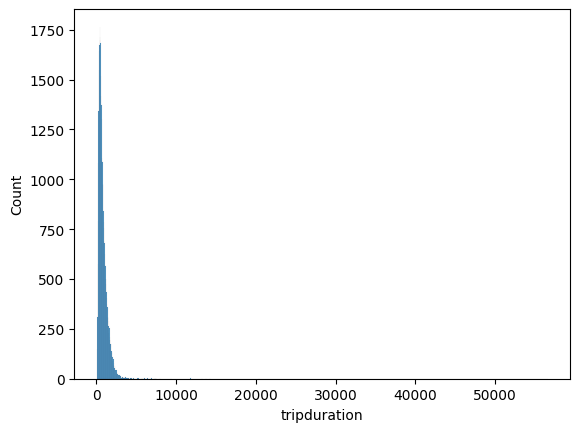

In [42]:
sns.histplot(df["tripduration"]) #histogram of trip duration

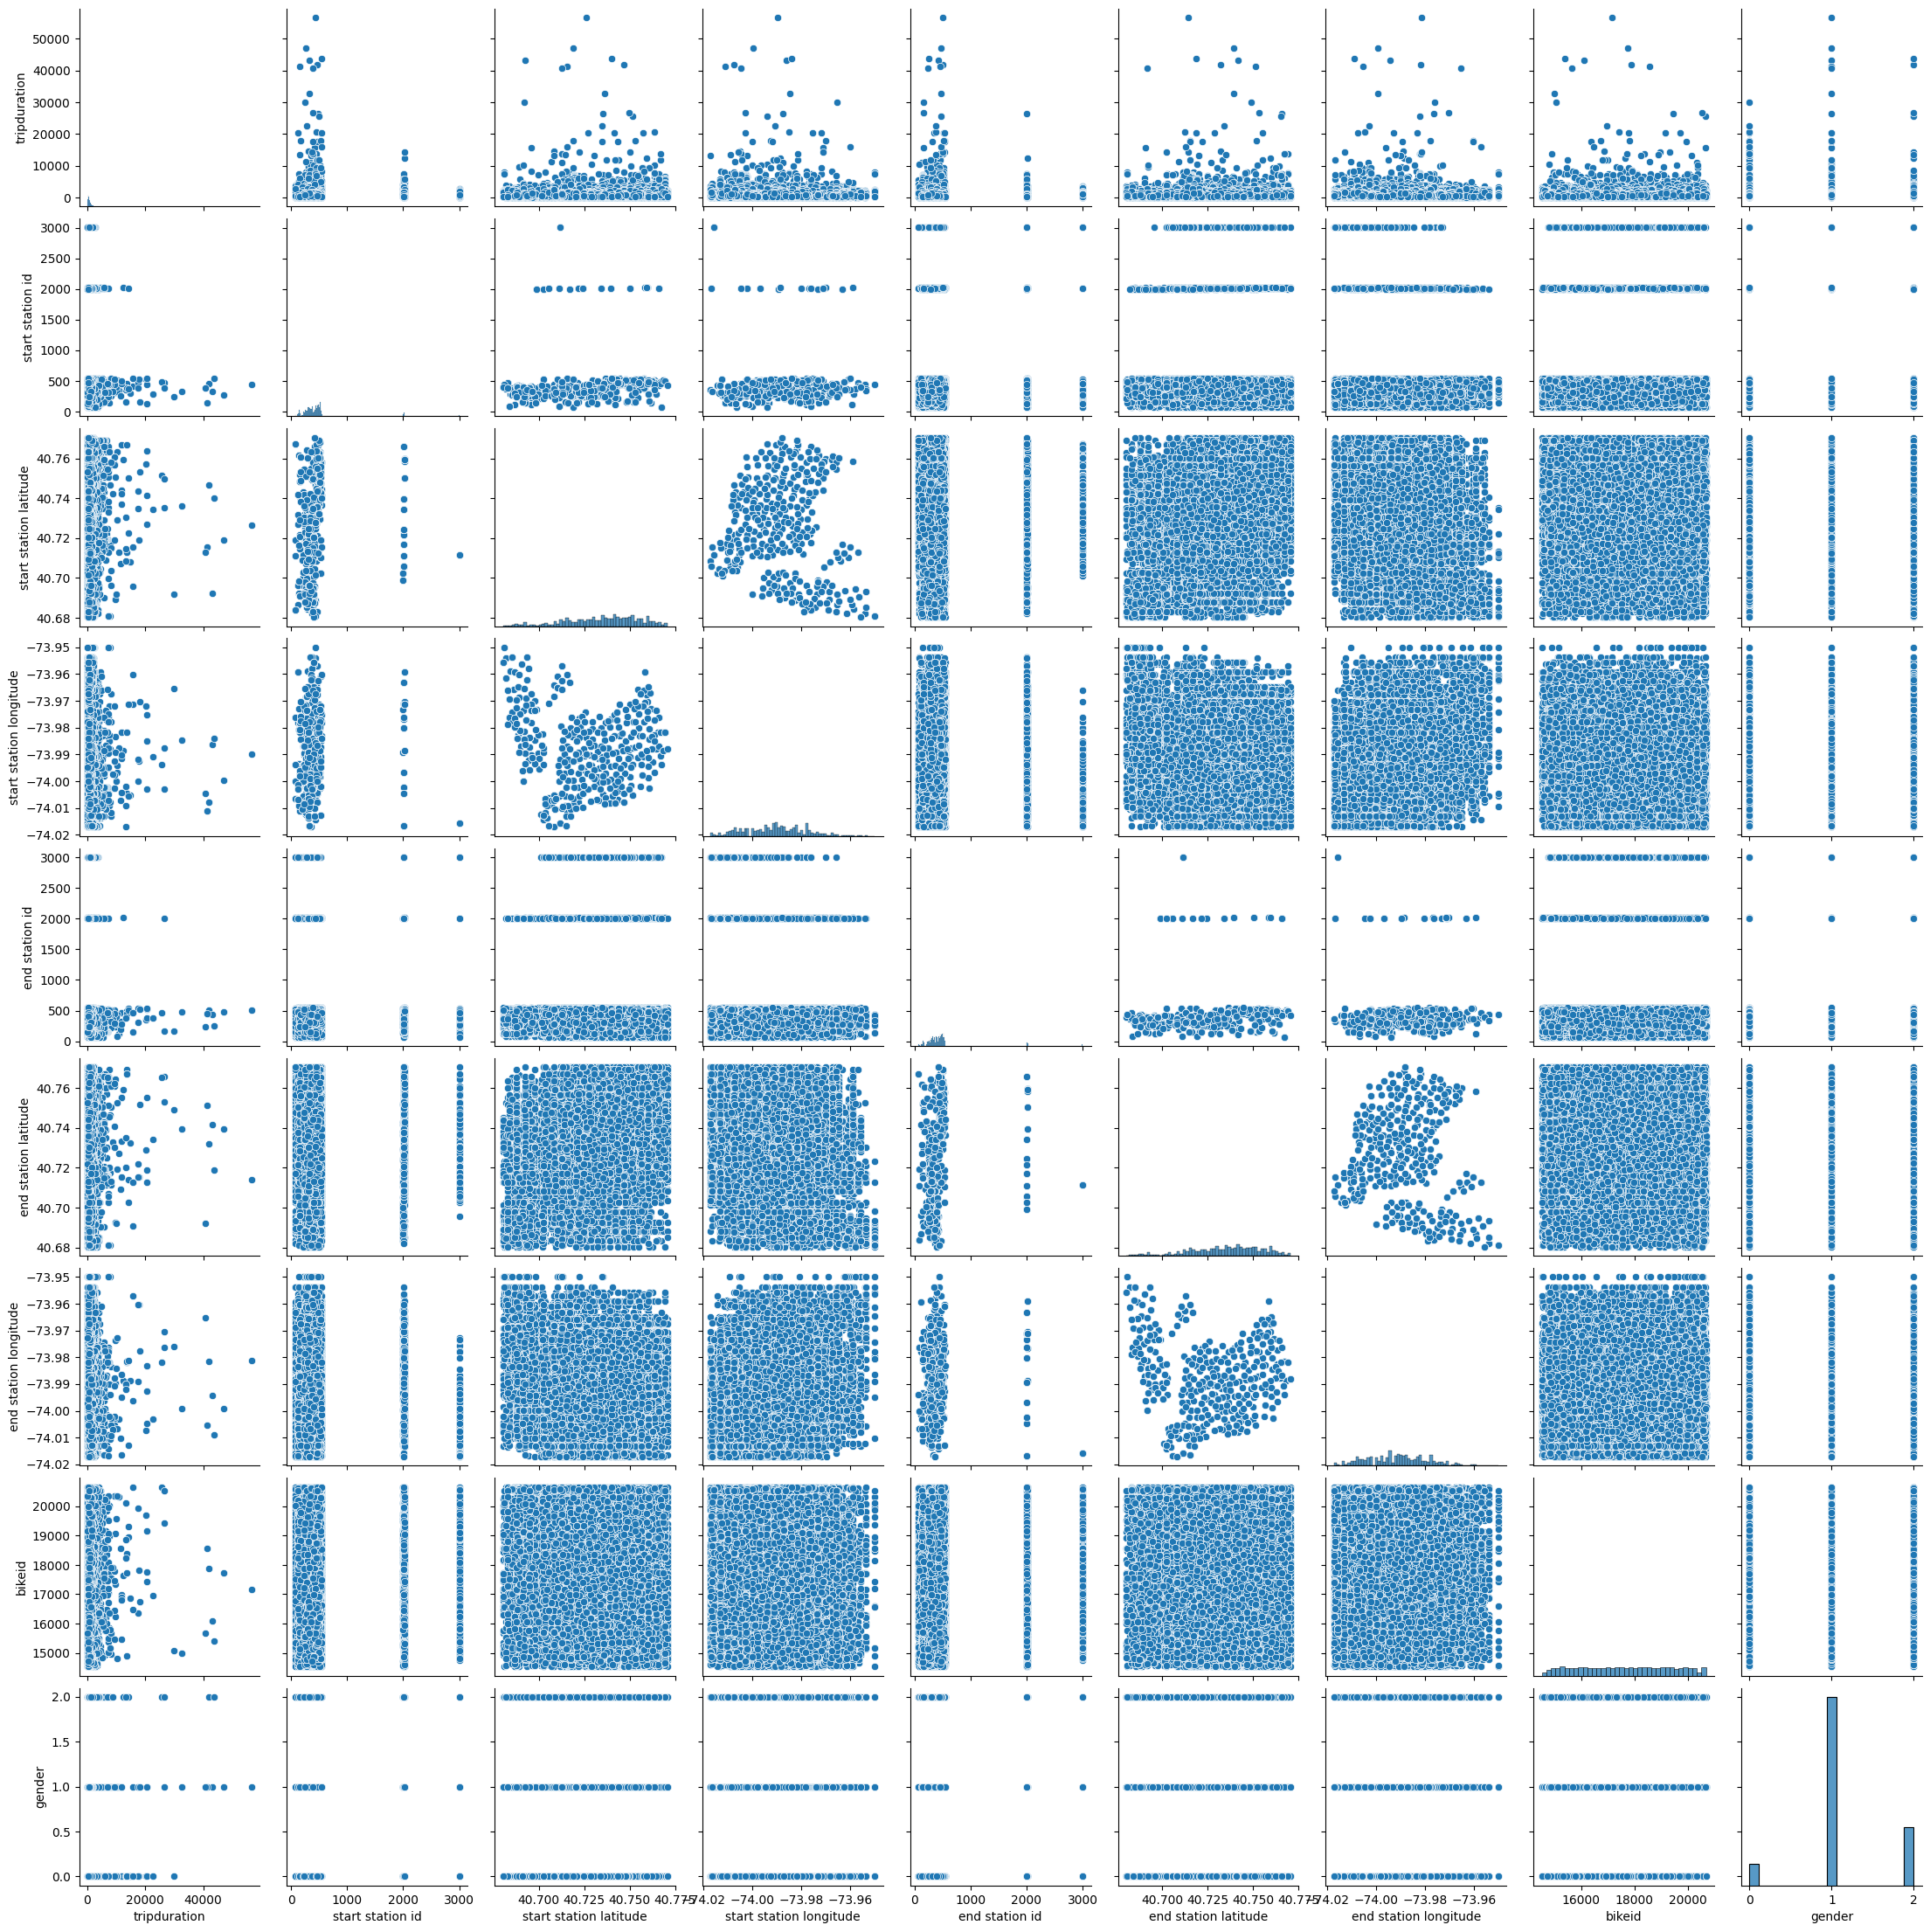

In [7]:
#plot scatter plots for all variables using pair plot function
sns.pairplot(df)

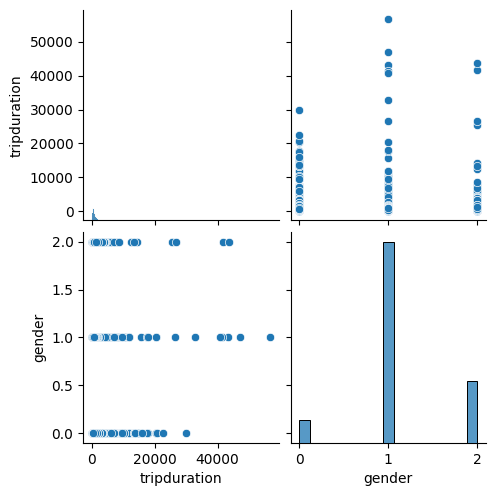

In [8]:
#it can be more valuable to pick specific variables and plot their subsection of scatter plots 
#to better understand the visualizations.

sns.pairplot(df[['tripduration','gender']])
#men took the longest bike trips

Q: What percentage of city bike users are subscribers?

In [9]:
numSubs = df['usertype'].loc[df['usertype']=='Subscriber'].count()
numUsers = len(df)
print(round(numSubs/numUsers *100,2), '% of total riders on 10/01/2013 are annual subscribers.')

92.03 % of total riders on 10/01/2013 are annual subscribers.


Q: How does trip length vary based on trip start time?

In [10]:
#create a new column of just the start time hour
df['hour'] = df.starttime.apply(lambda x:x[11:13]).astype('str')
# df.starttime - Accesses the starttime column
# .apply(lambda x: x[11:13]) - For each datetime string, extracts characters at positions 11-12 (the hour part)
# .astype('str') - Ensures the result is treated as strings (though often redundant since slicing strings already returns strings)

<AxesSubplot: xlabel='hour', ylabel='tripduration'>

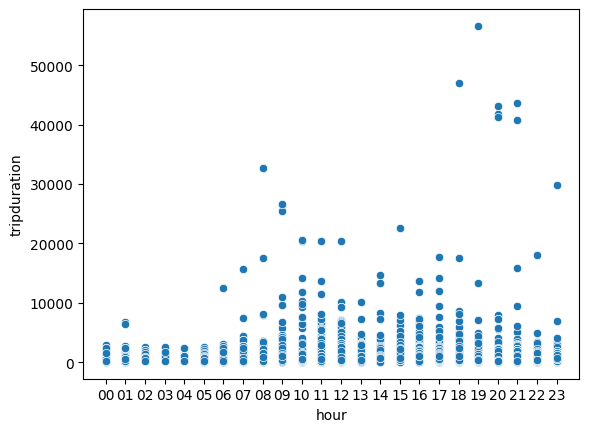

In [11]:
#Visualize correlation
sns.scatterplot(x='hour',y='tripduration', data=df)

<AxesSubplot: xlabel='hour', ylabel='tripduration'>

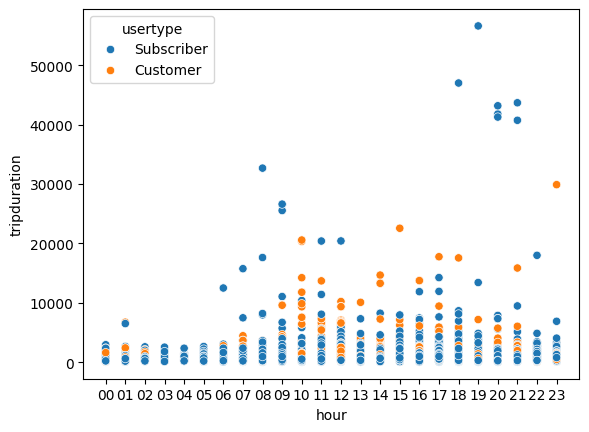

In [12]:
sns.scatterplot(x='hour',y='tripduration',data=df, hue='usertype')

### Q: Which bike stations are most popular to start trips from?

In [13]:
#use group by method
df2 = df.groupby(['start station id']).size().reset_index(name='counts')


df.groupby(['start station id'])
    Groups the DataFrame by unique values in the start station id column
    Think of this like Excel's "PivotTable" - it creates clusters of rows that share the same station ID
.size()
    Counts the number of rows/rides in each group (each station)
    This automatically creates a count column (unnamed at this point)
.reset_index(name='counts')
    Converts the result back to a regular DataFrame (groupby creates a special object)
    Names the count column as 'counts' (otherwise it would be unnamed)

In [14]:
df2

,start station id,counts
0,72,112
1,79,91
2,82,39
3,83,52
4,116,213
...,...,...
323,2017,127
324,2021,228
325,2022,105
326,2023,74


In [27]:
temp = df.drop_duplicates('start station id')
#left join to df2
df2 = pd.merge(df2, temp[['start station id','start station name', 'start station latitude','start station longitude']],how = 'left', on = ['start station id'])

In [30]:
df2

,start station id,counts,start station name,start station latitude,start station longitude
0,72,112,W 52 St & 11 Ave,40.767272,-73.993929
1,79,91,Franklin St & W Broadway,40.719116,-74.006667
2,82,39,St James Pl & Pearl St,40.711174,-74.000165
3,83,52,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
4,116,213,W 17 St & 8 Ave,40.741776,-74.001497
...,...,...,...,...,...
323,2017,127,E 43 St & 2 Ave,40.750224,-73.971214
324,2021,228,W 45 St & 8 Ave,40.759291,-73.988597
325,2022,105,E 59 St & Sutton Pl,40.758491,-73.959206
326,2023,74,E 55 St & Lexington Ave,40.759681,-73.970314


1. temp = df.drop_duplicates('start station id')
Goal: Create a DataFrame (temp) with only one row per unique station.

How?

drop_duplicates('start station id') keeps only the first occurrence of each station ID in df.

Example: If df has 100 trips from station "A", temp will have just 1 row for station "A" (with its name, lat/long, etc.).

2. pd.merge(...) (Left Join)
Goal: Take df2 and add station details (name, lat, long) by matching station IDs.

How?

pd.merge(df2, temp[...], how='left', on=['start station id']) means:

df2: The main DataFrame you're enriching.

temp[...]: The subset of columns (station id, name, lat, long) from the unique stations list.

how='left': Keep all rows in df2, even if some stations don’t match (unlikely here, since temp came from df).

on=['start station id']: Match rows where the station IDs are the same.

In [16]:
#initialize a map
m = folium.Map(location = [40.69196566, -73.9813018], title = 'OpenStreetMile', zoom_start = 12)
# Folium is a Python library that lets you create interactive maps using the Leaflet JavaScript library!

In [17]:
m
#empty folium map object centered around NYC with open street map tiles in the back
#now add data points in map as markers

In [36]:
for i in range(0, len(df2)): #use length of df to make code scalable
    folium.Circle(
        location = [df2.iloc[i]['start station latitude'],df.iloc[i]['start station longitude']],
        #coordinates
        popup = df2.iloc[i]['start station name'], #shows station name on click
        radius = float(df2.iloc[i]['counts'])/2, #circle size = ride count (convert to float)
        color = 'red', #border color
        fill = True, fill_color = 'red' #fill color
    ).add_to(m) #add to the existing Folium map 'm'

In [39]:
m